#  IRIS Dataset Classification


 1. import the library

In [2]:
import pandas as pd
import numpy as np
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# loading the data set

In [13]:
iris = pd.read_csv('/Users/jestin/Documents/data scince/datasets  2/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# to display about the stats
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# checking for imbalace 
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# preprocessing the dataset

In [18]:
# droping the duplicates
iris.drop_duplicates(inplace=True)

In [19]:
iris.duplicated().sum()

0

In [20]:
# handling missing values

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis (EDA)

### Histogram

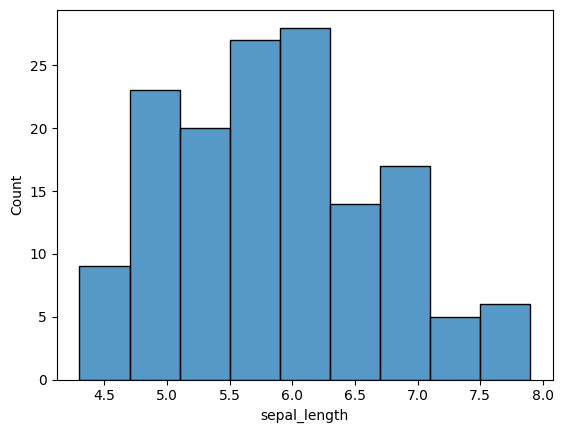

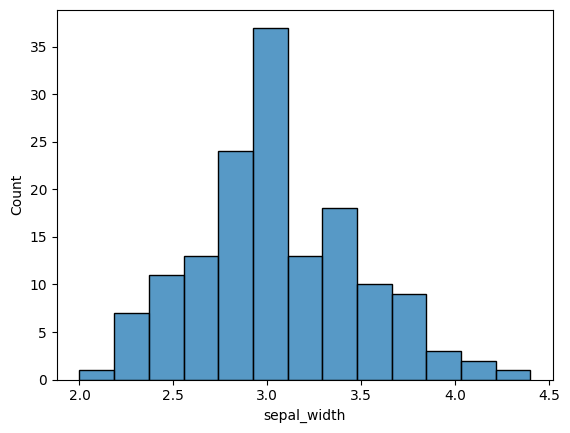

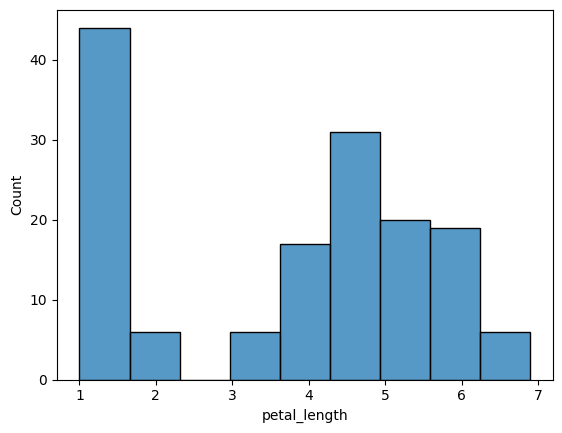

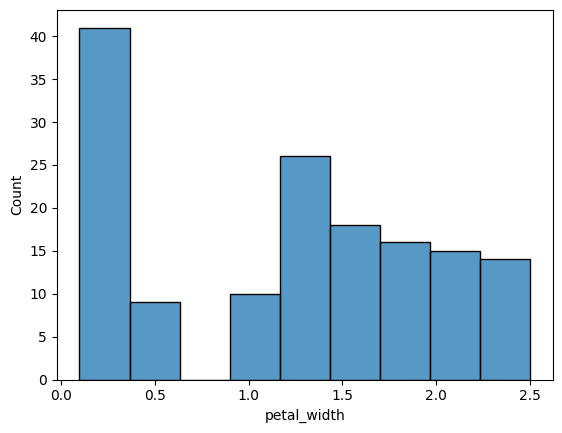

In [21]:

def histogram(col):
    sns.histplot(iris[col])
    plt.show()

for i in list(iris.select_dtypes(exclude =['object']).columns)[0:]:
    histogram(i)

### scater plot

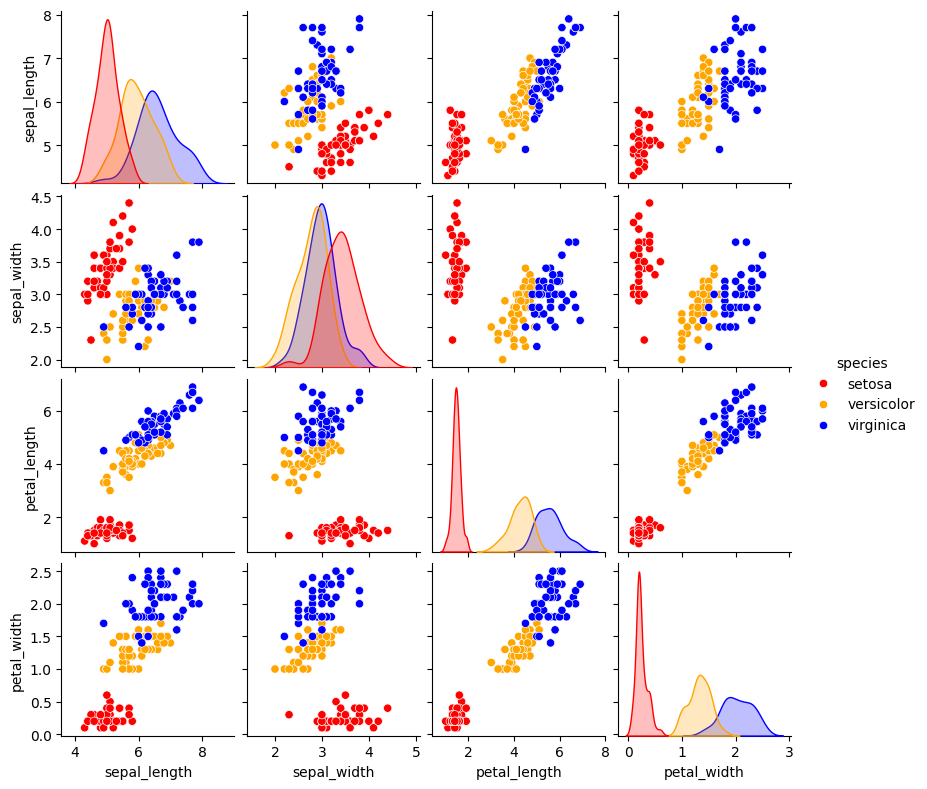

In [39]:
# visualizing the whole dataset
figsize = (12,6)
sns.pairplot(iris,hue="species",height=2,palette=['red', 'orange', 'blue'])
plt.show()

# coorelation Matrix

In [111]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### heat map

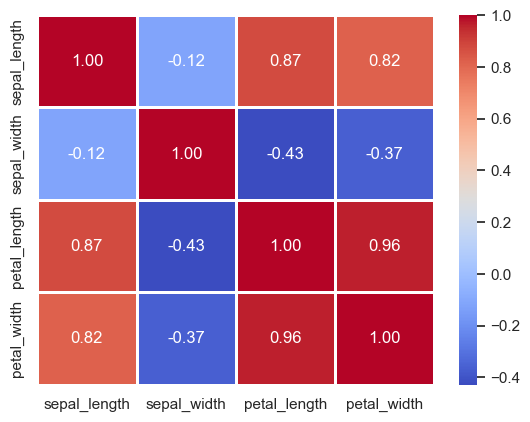

In [113]:
corr = iris.corr()
sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f", cmap='coolwarm')
plt.show()

# seperate the data into features and target

In [40]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [41]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[149 rows x 4 columns]


In [42]:
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 149, dtype: object


# split the data into training and testing 

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)


### model 1 
#### Building  support vector Machine


In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)


SVC()

In [ ]:
# predicting the model
y_pred_train = model_svc.predict(x_train)
y_pred_test = model_svc.predict(x_test)


In [ ]:
# evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print('training_accuracy :',accuracy_score(y_train,y_pred_train))
print('test_accuracy :',accuracy_score(y_test,y_pred_test))
accuracy_svm= accuracy_score(y_test,y_pred_test)
print("======================")
print(classification_report(y_train,y_pred_train))
print()
print(classification_report(y_test,y_pred_test))

training_accuracy : 0.9411764705882353
test_accuracy : 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       0.88      0.98      0.92        44
   virginica       0.97      0.83      0.90        36

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [104]:
confusion_matrix(y_train,y_pred_train)
confusion_matrix(y_test,y_pred_test)


array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 12]])

# model 2

### Logistic regression

In [113]:

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [114]:
# predicting the model
y_pred_train = model_svc.predict(x_train)
y_pred_test = model_svc.predict(x_test)

In [117]:
# evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print('training_accuracy :',accuracy_score(y_train,y_pred_train))
print('test_accuracy :',accuracy_score(y_test,y_pred_test))
accuracy_svm= accuracy_score(y_test,y_pred_test)
print()
print("======================")
print()
print(classification_report(y_train,y_pred_train))
print()
print(classification_report(y_test,y_pred_test))

training_accuracy : 0.9411764705882353
test_accuracy : 0.9666666666666667


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        39
  versicolor       0.88      0.98      0.92        44
   virginica       0.97      0.83      0.90        36

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.94      0.94      0.94       119


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Axes(0.125,0.11;0.775x0.77)


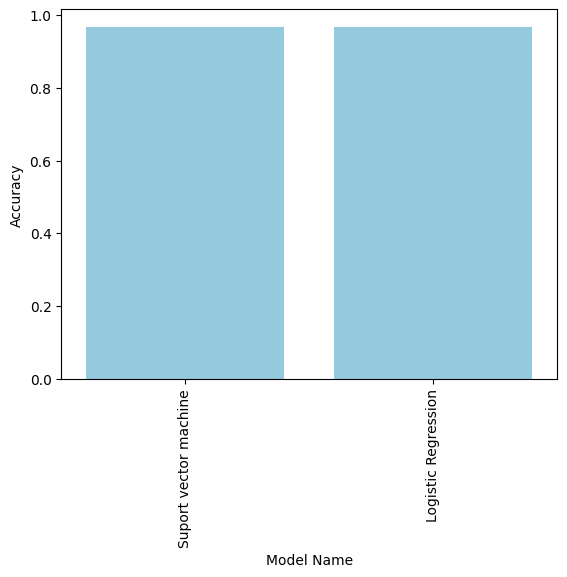

In [118]:
charts = sns.barplot(x='Model Name', y='Accuracy', data=df_accuracy,color = 'skyblue')
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)